
# Hi! Visuals start in the second code box.

In [2]:
import os
import numpy as np
import base64
import tempfile
from io import BytesIO
import subprocess
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PIL import Image, ImageDraw, ImageFont

def deg_to_rad(deg):
    return deg * np.pi / 180

values = [100, 80, 60, 40, 20, 0]
x_axis_deg = [0, 36, 72, 108, 144]
x_axis_vals = [deg_to_rad(i) for i in x_axis_deg]

num_bars = 5
bar_width = deg_to_rad(180 / num_bars) * 0.95
gap = deg_to_rad(180 / num_bars) * 0.05

ticks = [100, "•", 80, "•", 60, "•", 40, "•", 20, "•", 0]
tick_loc_old = [0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180]
tick_loc_new = [0, 18, 33, 52, 66, 90, 114, 128, 147, 162, 180]

airi_score = 60
highlight_index = next((i for i, v in enumerate(values) if v >= airi_score > (v - 20)), None)

fillcolor= "#FFFCF8"

needle_color = "#3caea3" # teal

highlighted_edgecolor = "#6b6b6b" # default dark grey
default_edgecolor = "#D3D3DA" # default light grey

positive_edgecolor = "#44c96d" # vibrant green
neutral_edgecolor = "#ffeb99" # soft yellow
negative_edgecolor = "#ff6b6b" # warm coral

annotations_original = [("High\nRisk", 18, 2.0, -75),
                ("Rising\nRisk", 54, 2.0, -40),
                ("Balanced\nEfforts", 90, 2.0, 0),
                ("Slowed\nAI Dev", 126, 2.0, 40),
                ("Blocked\nAI Dev", 162, 2.0, 75)]

annotations_new = [("Volatile", 18, 2.05, -75),
                ("Unstable", 54, 2.05, -40),
                ("Harmonized", 90, 2.05, 0),
                ("Constrained", 126, 2.05, 40),
                ("Stagnant", 162, 2.05, 75)]

sub_annotations = [("High Risk", 18, 1.85, -75),
                ("Rising Risk", 54, 1.85, -40),
                ("Optimal", 90, 1.85, 0),
                ("Rising Risk", 126, 1.85, 40),
                ("High Risk", 162, 1.85, 75)]




def create_gauge(airi_score, ax,
                 annotations=annotations_new, annotation_fontsize=16,
                 highlighted_annotation_color = "black",
                 sub_annotate=True, sub_annotation_fontsize=12,
                 subannotation_color=None,
                 highlighted_subannotation_color="black",
                 tick_color=None,
                 needle_color=None,
                 bar_edgecolor=None):

  highlight_index = next((i for i, v in enumerate(values) if v >= airi_score > (v - 20)), None)

  # TICKS
  for i, (loc, val) in enumerate(
          zip([deg_to_rad(i) for i in [0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180]], ticks)):
      if tick_color == None:
        tick_color = highlighted_edgecolor
      elif tick_color == "varcolor_tick":
        tick_color = negative_edgecolor if i <= 1 or i >= 9 else neutral_edgecolor if i <=3 or i >= 7 else positive_edgecolor
      else:
        tick_color == tick_color
      ha = "center" # "right" if i <= 4 else ("center" if i == 5 else "left")
      plt.annotate(val, xy=(loc, 1.3), ha=ha, va="center", fontsize="20", color=tick_color)

  # NEEDLE
  if needle_color == None:
    needle_color = "black"
  elif needle_color == "varcolor_needle":
    needle_color = negative_edgecolor if airi_score <= 20 or airi_score >= 80 else neutral_edgecolor if airi_score <=40 or airi_score >= 60 else positive_edgecolor
  else:
    needle_color = needle_color
  plt.annotate(round(airi_score), xytext=(0, 0), xy=(deg_to_rad((100 - round(airi_score)) / 100 * 180), 1.8),
                fontsize=55, color=fillcolor, va="center", ha="center",
                arrowprops=dict(arrowstyle="wedge, tail_width=0.5", color=needle_color),
                bbox=dict(boxstyle="circle, pad=0.4", facecolor=needle_color, linewidth=0))

  # BARS - EDGES
  for i, (x, height) in enumerate(zip(x_axis_vals, values)):
      if bar_edgecolor == None:
        ax.bar(x=x + gap / 2, width=bar_width, height=1, bottom=1.5, linewidth=5, edgecolor=highlighted_edgecolor if i == highlight_index else default_edgecolor, color=fillcolor, align="edge")
      elif bar_edgecolor == "varcolor_bar":
        ax.bar(x=x + gap / 2, width=bar_width, height=1, bottom=1.5, linewidth=5, edgecolor=negative_edgecolor if i == 0 or i == 4 else neutral_edgecolor if i == 1 or i == 3 else positive_edgecolor, color=fillcolor, align="edge")
      elif bar_edgecolor == "varcolor_bar_highlighted":
        varcolor=negative_edgecolor if i == 0 or i == 4 else neutral_edgecolor if i == 1 or i == 3 else positive_edgecolor
        ax.bar(x=x + gap / 2, width=bar_width, height=1, bottom=1.5, linewidth=5, edgecolor=varcolor if i == highlight_index else default_edgecolor, color=fillcolor,
            align="edge")


  # ANNOTATIONS
  for i, (text, x, y, rot) in enumerate(annotations):
      color = highlighted_annotation_color if i == highlight_index else highlighted_edgecolor
      plt.annotate(text, xy=(deg_to_rad(x), y), rotation=rot, fontweight="bold", fontsize=annotation_fontsize, color=color,
                    rotation_mode='anchor', transform=ax.transData, ha="center")

  # SUB-ANNOTATIONS
  if sub_annotate == True:
    for i, (text, x, y, rot) in enumerate(sub_annotations):
      if subannotation_color == None:
        subannotation_color = highlighted_subannotation_color if i == highlight_index else highlighted_edgecolor
      elif subannotation_color == "varcolor_subannotation":
        subannotation_color = negative_edgecolor if i == 0 or i == 4 else neutral_edgecolor if i == 1 or i == 3 else positive_edgecolor
      plt.annotate(text, xy=(deg_to_rad(x), y), rotation=rot, fontsize=sub_annotation_fontsize, color=subannotation_color,
                      rotation_mode='anchor', transform=ax.transData, ha="center")

  ax.set_thetalim(0, np.pi)
  ax.set_axis_off()





def create_3_colorway(title, annotations=annotations_new, annotation_fontsize=16,
                 highlighted_annotation_color = "black",
                 sub_annotate=True, sub_annotation_fontsize=12,
                 subannotation_color=None,
                 highlighted_subannotation_color="black",
                 tick_color=None, needle_color=None,
                 bar_edgecolor=None):

  # Create figure and subplots
  fig, axs = plt.subplots(1, 3, figsize=(30, 10), dpi=100, subplot_kw={'projection': 'polar'})
  fig.text(0.15, 0.7, title, fontsize=50, fontweight="bold", ha='left')

  # 1. GREEN SIGNIFIER
  ax = fig.add_subplot(axs[0], projection="polar")
  fig.patch.set_alpha(0)
  ax.set_facecolor('none')
  create_gauge(50, axs[0], annotations, annotation_fontsize, highlighted_annotation_color,
              sub_annotate, sub_annotation_fontsize, subannotation_color,
              highlighted_subannotation_color,
              tick_color, needle_color, bar_edgecolor)


# 2. YELLOW SIGNIFIER
  ax = fig.add_subplot(axs[1], projection="polar")
  fig.patch.set_alpha(0)
  ax.set_facecolor('none')
  create_gauge(70, axs[1], annotations, annotation_fontsize, highlighted_annotation_color,
              sub_annotate, sub_annotation_fontsize, subannotation_color,
              highlighted_subannotation_color,
              tick_color, needle_color, bar_edgecolor)


  # 3. RED SIGNIFIER
  ax = fig.add_subplot(axs[2], projection="polar")
  fig.patch.set_alpha(0)
  ax.set_facecolor('none')
  create_gauge(90, axs[2], annotations, annotation_fontsize, highlighted_annotation_color,
              sub_annotate, sub_annotation_fontsize, subannotation_color,
              highlighted_subannotation_color,
              tick_color, needle_color, bar_edgecolor)


<br><br>


# Visuals start from here.

The first one is how the graph is looking like right now on the website and X posts. (Except the black circle in the middle is not as big -- difference is due to some elements having absolute sizes and some having respective sizes.)

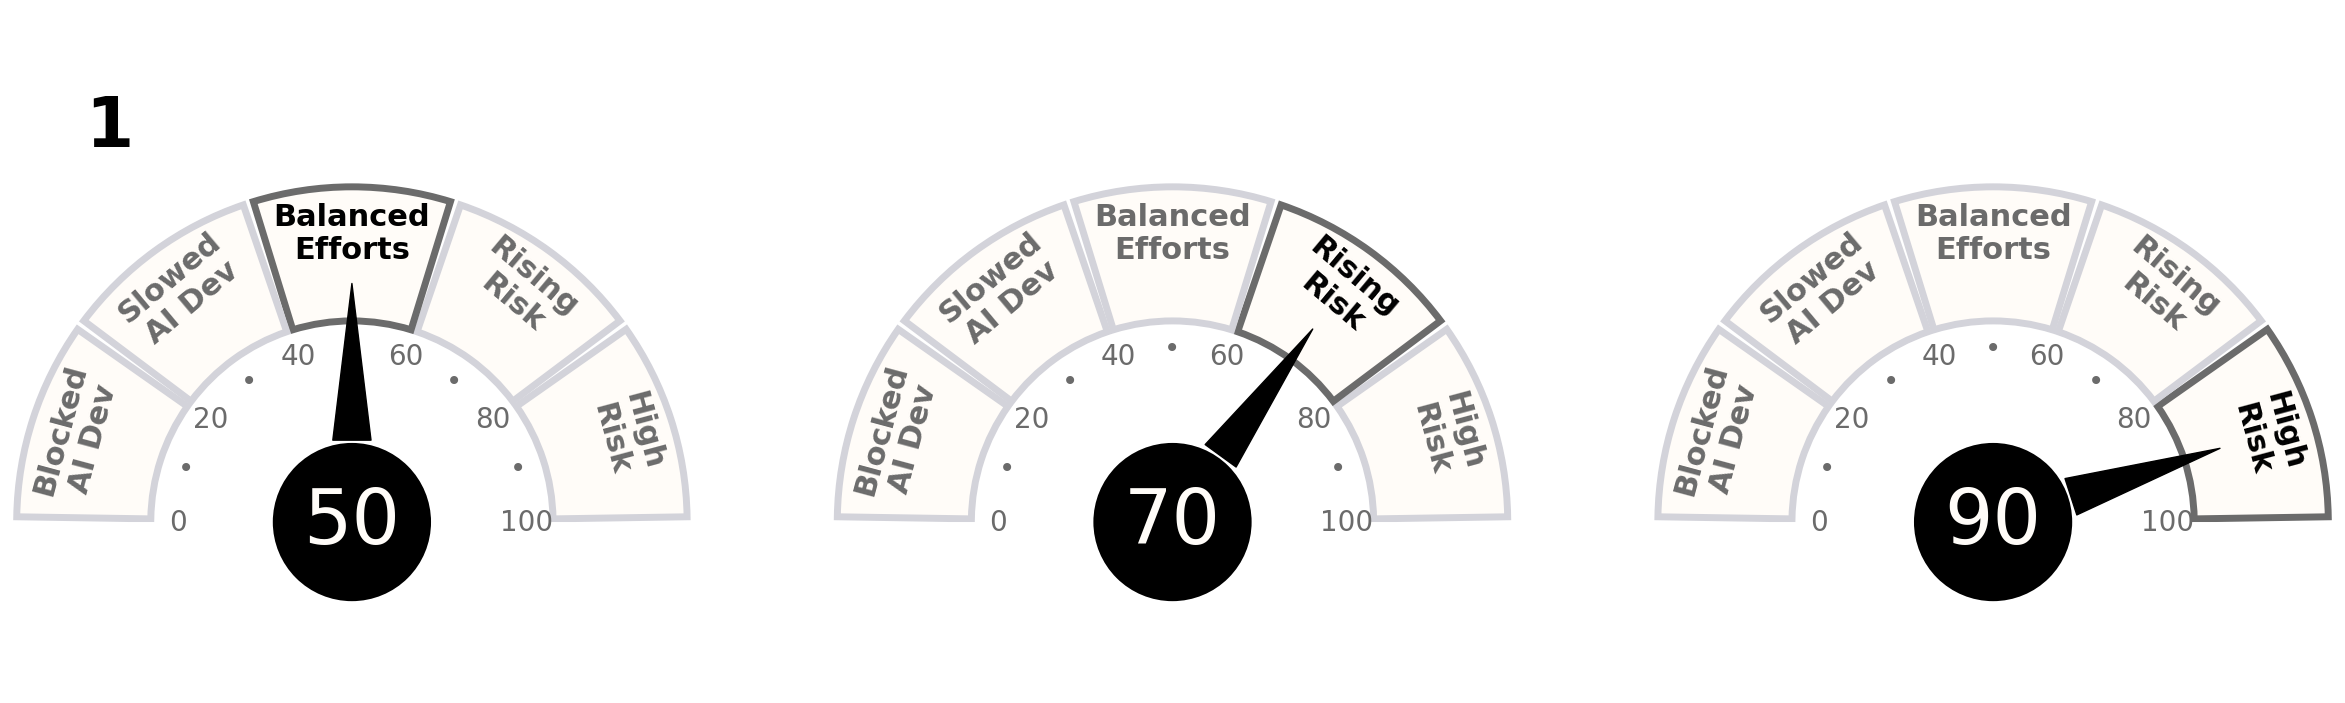

In [ ]:
create_3_colorway(title="1", annotations=annotations_original, annotation_fontsize=22,
                 highlighted_annotation_color = "black",
                 sub_annotate=False, sub_annotation_fontsize=None,
                 subannotation_color=None,
                 highlighted_subannotation_color="black",
                 tick_color=None, needle_color=None, bar_edgecolor=None)

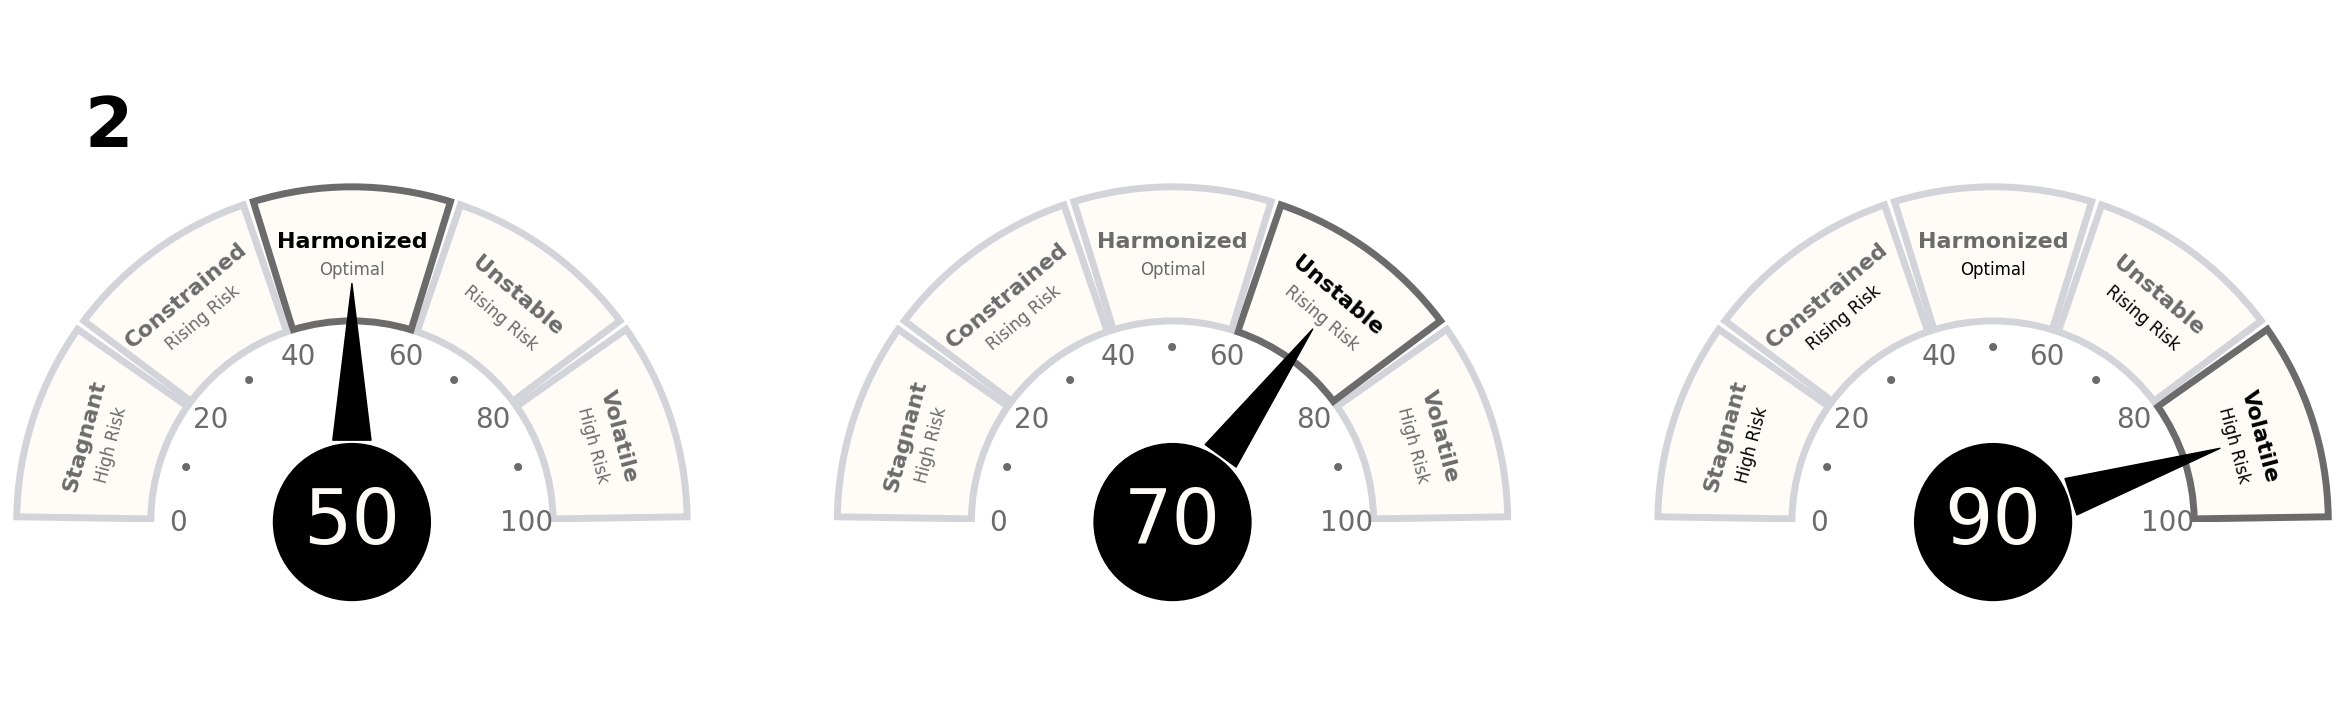

In [ ]:
create_3_colorway(title="2", annotations=annotations_new, annotation_fontsize=16,
                 highlighted_annotation_color = "black",
                 sub_annotate=True, sub_annotation_fontsize=12,
                 subannotation_color=None,
                 highlighted_subannotation_color="black",
                 tick_color=None,
                 needle_color=None,
                 bar_edgecolor=None)

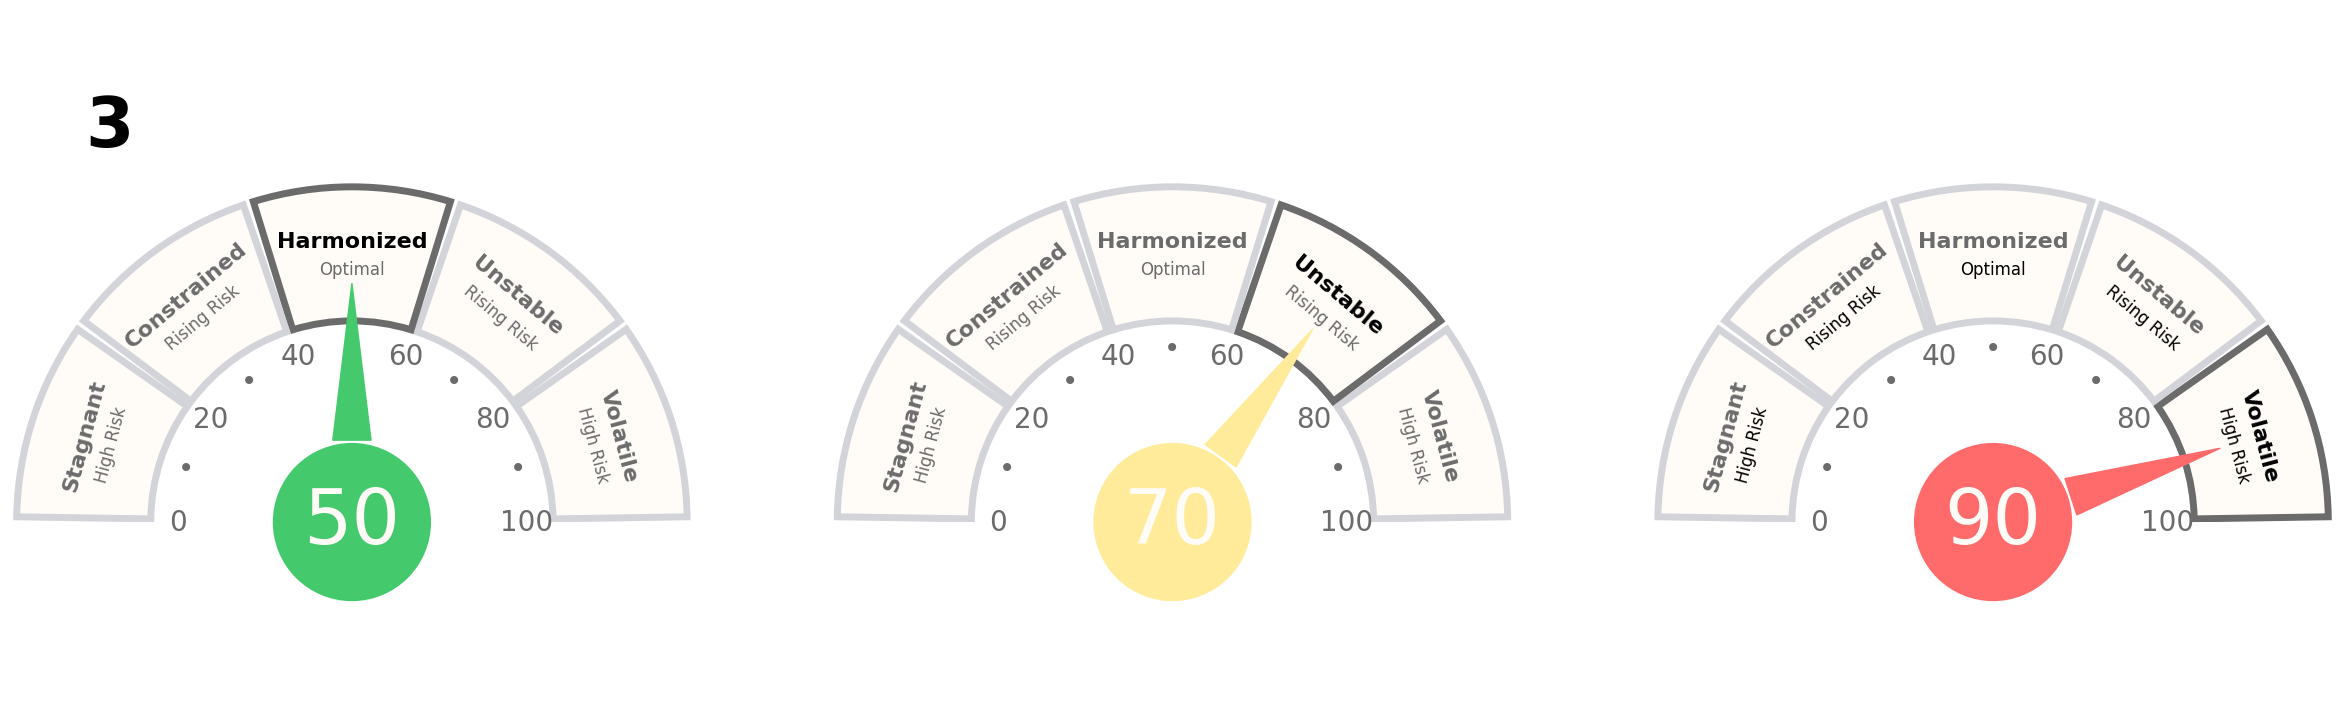

In [ ]:
create_3_colorway(title="3", annotations=annotations_new, annotation_fontsize=16,
                 highlighted_annotation_color = "black",
                 sub_annotate=True, sub_annotation_fontsize=12,
                 subannotation_color=None,
                 highlighted_subannotation_color="black",
                 tick_color=None,
                 needle_color="varcolor_needle",
                 bar_edgecolor=None)

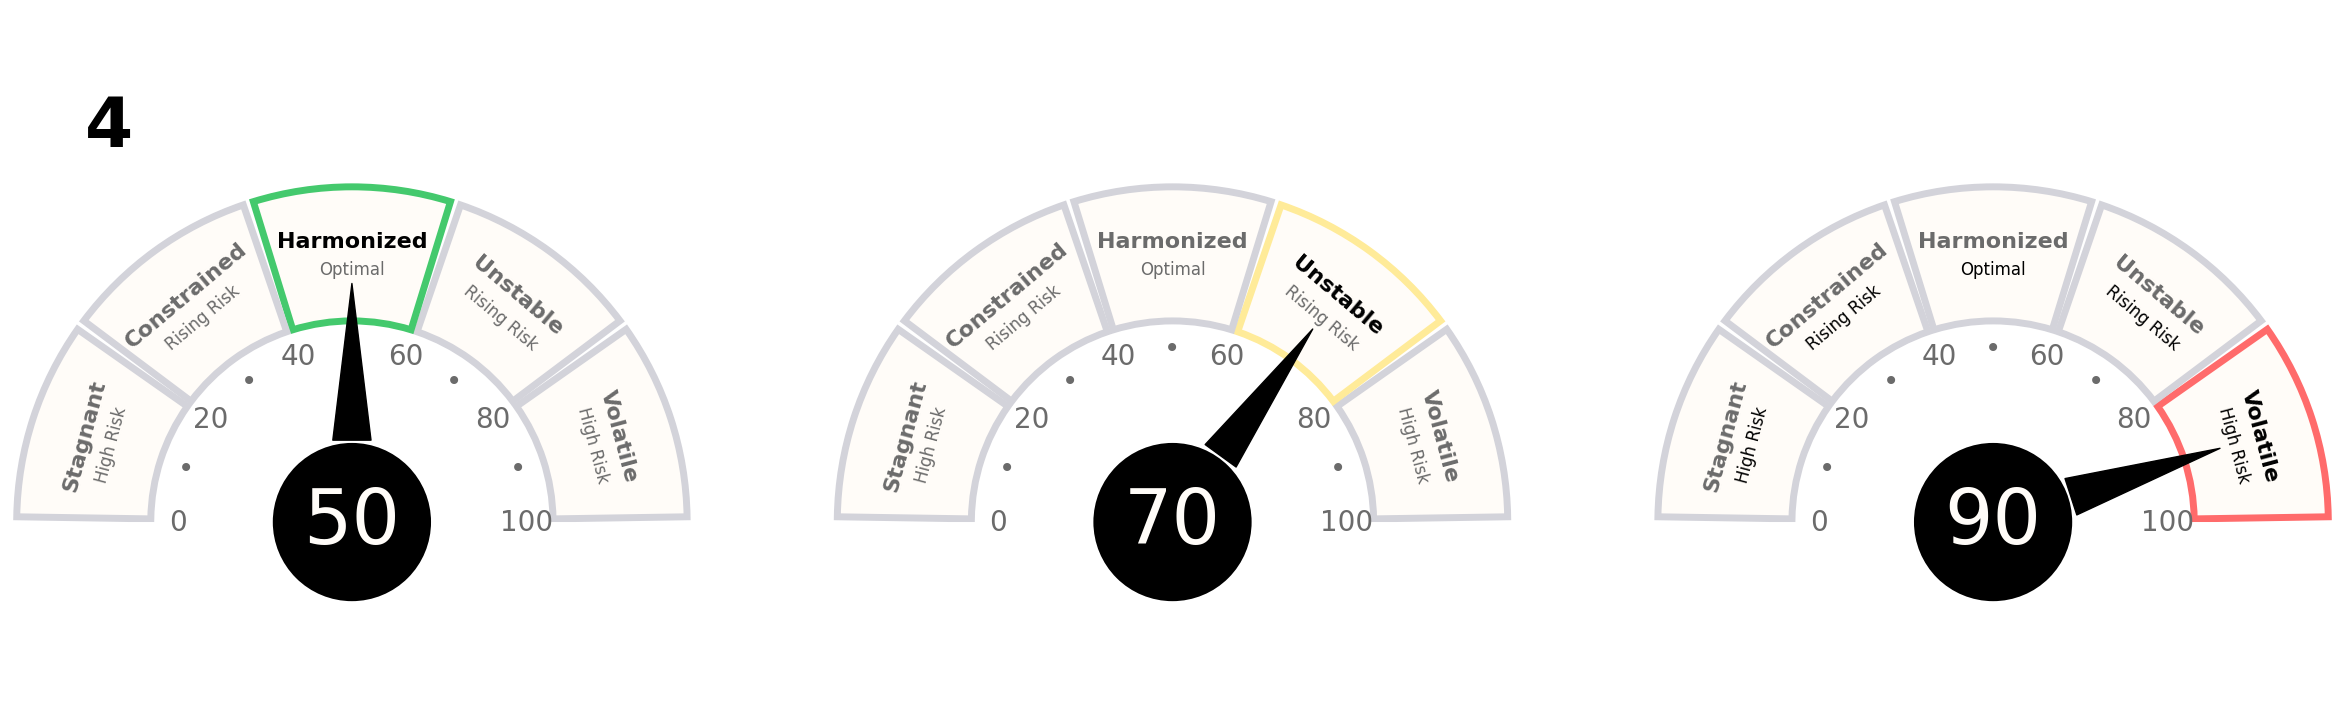

In [ ]:
create_3_colorway(title="4", annotations=annotations_new, annotation_fontsize=16,
                 highlighted_annotation_color = "black",
                 sub_annotate=True, sub_annotation_fontsize=12,
                 subannotation_color=None,
                 highlighted_subannotation_color="black",
                 tick_color=None,
                 needle_color=None,
                 bar_edgecolor="varcolor_bar_highlighted")

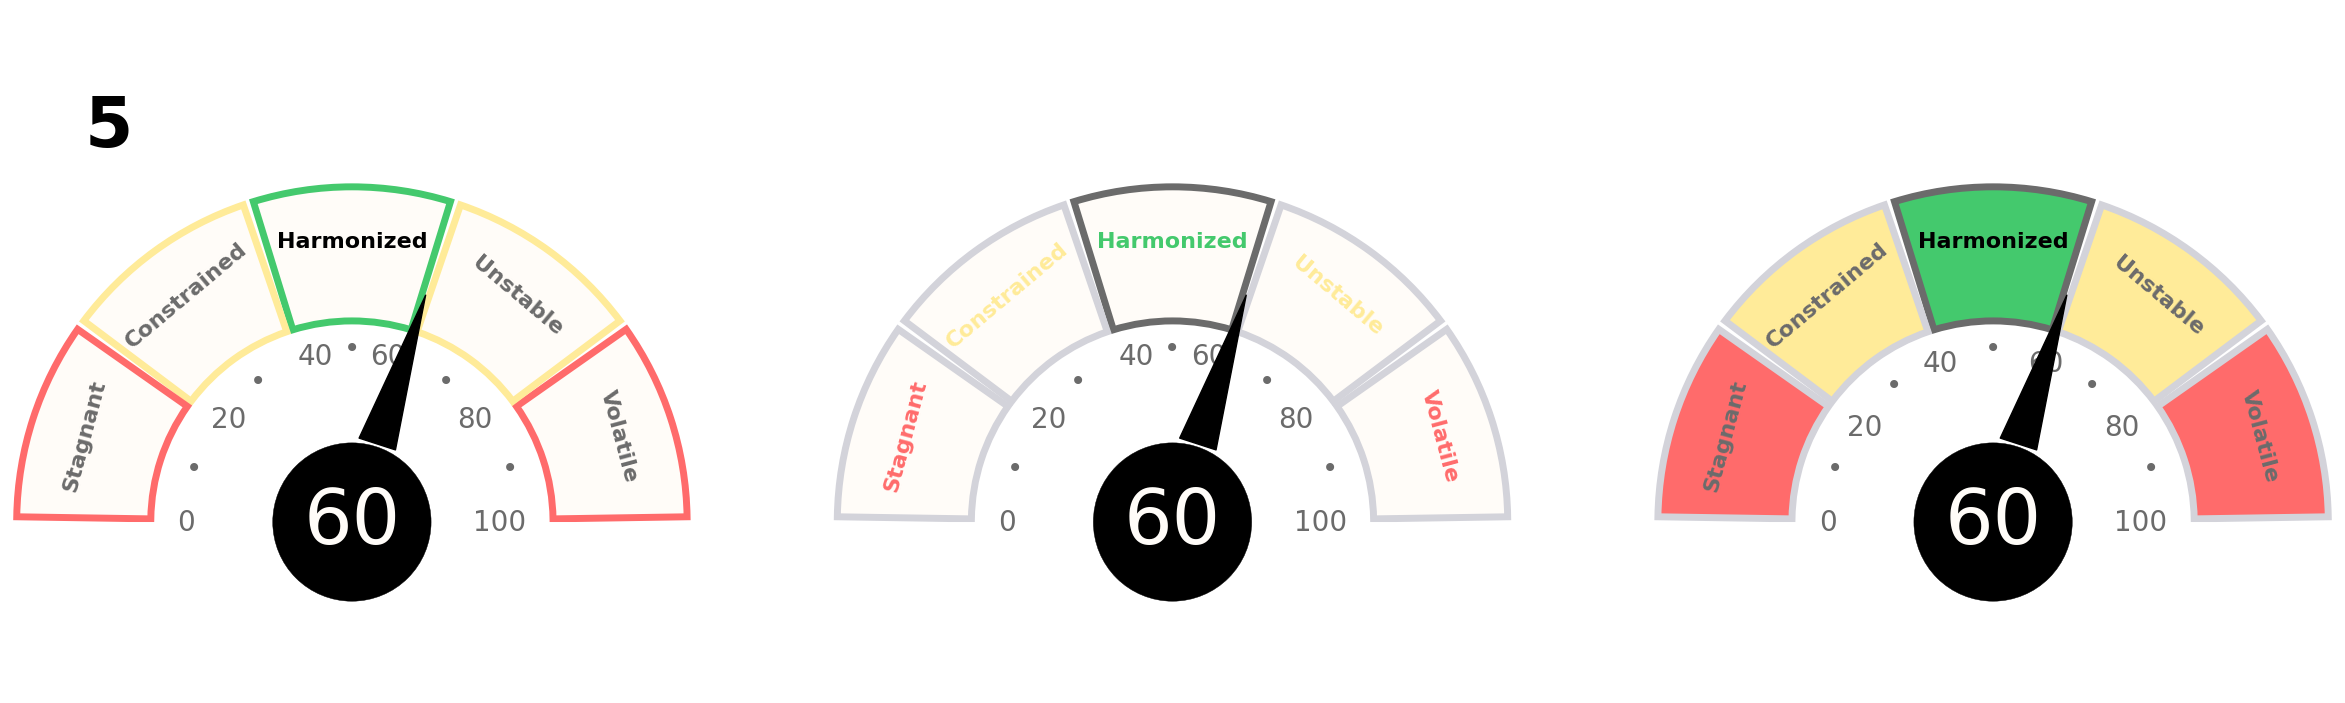

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10), dpi=100, subplot_kw={'projection': 'polar'})
fig.text(0.15, 0.7, "5", fontsize=50, fontweight="bold", ha='left')

# 1
ax = fig.add_subplot(axs[0], projection="polar")
fig.patch.set_alpha(0)
ax.set_facecolor('none')

# TICKS
for i, (loc, val) in enumerate(
        zip([deg_to_rad(i) for i in [0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180]], ticks)):
    color = highlighted_edgecolor
    ha = "right" if i <= 4 else ("center" if i == 5 else "left")
    plt.annotate(val, xy=(loc, 1.3), ha=ha, va="center", fontsize="20", color=color)

# NEEDLE
plt.annotate(round(airi_score), xytext=(0, 0), xy=(deg_to_rad((100 - round(airi_score)) / 100 * 180), 1.8),
              fontsize=55, color=fillcolor, va="center", ha="center",
              arrowprops=dict(arrowstyle="wedge, tail_width=0.5", color="black"),
              bbox=dict(boxstyle="circle, pad=0.4", facecolor="black", linewidth=0.3))

# BARS - EDGES
for i, (x, height) in enumerate(zip(x_axis_vals, values)):
    edgecolor = negative_edgecolor if i == 0 or i == 4 else neutral_edgecolor if i == 1 or i == 3 else positive_edgecolor
    ax.bar(x=x + gap / 2, width=bar_width, height=1, bottom=1.5, linewidth=5, edgecolor=edgecolor, color=fillcolor,
            align="edge")

# ANNOTATIONS
for i, (text, x, y, rot) in enumerate(annotations_new):
    color = "black" if i == highlight_index else highlighted_edgecolor
    plt.annotate(text, xy=(deg_to_rad(x), y), rotation=rot, fontweight="bold", fontsize=16, color=color,
                  rotation_mode='anchor', transform=ax.transData, ha="center")

ax.set_thetalim(0, np.pi)
ax.set_axis_off()


# 2
ax = fig.add_subplot(axs[1], projection="polar")
fig.patch.set_alpha(0)
ax.set_facecolor('none')
# TICKS
for i, (loc, val) in enumerate(
        zip([deg_to_rad(i) for i in [0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180]], ticks)):
    color = highlighted_edgecolor
    ha = "right" if i <= 4 else ("center" if i == 5 else "left")
    plt.annotate(val, xy=(loc, 1.3), ha=ha, va="center", fontsize="20", color=color)

# NEEDLE
plt.annotate(round(airi_score), xytext=(0, 0), xy=(deg_to_rad((100 - round(airi_score)) / 100 * 180), 1.8),
              fontsize=55, color=fillcolor, va="center", ha="center",
              arrowprops=dict(arrowstyle="wedge, tail_width=0.5", color="black"),
              bbox=dict(boxstyle="circle, pad=0.4", facecolor="black", linewidth=0.3))

# BARS - EDGES
for i, (x, height) in enumerate(zip(x_axis_vals, values)):
    edgecolor = highlighted_edgecolor if i == highlight_index else default_edgecolor
    ax.bar(x=x + gap / 2, width=bar_width, height=1, bottom=1.5, linewidth=5, edgecolor=edgecolor, color=fillcolor,
            align="edge")

# ANNOTATIONS
for i, (text, x, y, rot) in enumerate(annotations_new):
    color = negative_edgecolor if i == 0 or i == 4 else neutral_edgecolor if i == 1 or i == 3 else positive_edgecolor
    plt.annotate(text, xy=(deg_to_rad(x), y), rotation=rot, fontweight="bold", fontsize=16, color=color,
                  rotation_mode='anchor', transform=ax.transData, ha="center")

ax.set_thetalim(0, np.pi)
ax.set_axis_off()


# 3
ax = fig.add_subplot(axs[2], projection="polar")
fig.patch.set_alpha(0)
ax.set_facecolor('none')
# TICKS
for i, (loc, val) in enumerate(
        zip([deg_to_rad(i) for i in [0, 18, 33, 52, 66, 90, 114, 128, 147, 162, 180]], ticks)):
    color = highlighted_edgecolor
    ha = "right" if i <= 4 else ("center" if i == 5 else "left")
    #ha = "right" if i in [0, 1, 2, 3] else ("center" if i in [4, 5, 6] else "left")
    plt.annotate(val, xy=(loc, 1.3), ha=ha, va="center", fontsize="20", color=color)

# NEEDLE
plt.annotate(round(airi_score), xytext=(0, 0), xy=(deg_to_rad((100 - round(airi_score)) / 100 * 180), 1.8),
              fontsize=55, color=fillcolor, va="center", ha="center",
              arrowprops=dict(arrowstyle="wedge, tail_width=0.5", color="black"),
              bbox=dict(boxstyle="circle, pad=0.4", facecolor="black", linewidth=0.3))

# BARS - EDGES
for i, (x, height) in enumerate(zip(x_axis_vals, values)):
    edgecolor = highlighted_edgecolor if i == highlight_index else default_edgecolor
    ax.bar(x=x + gap / 2, width=bar_width, height=1, bottom=1.5, linewidth=5, edgecolor=edgecolor,
           color = negative_edgecolor if i == 0 or i == 4 else neutral_edgecolor if i == 1 or i == 3 else positive_edgecolor,
            align="edge")

# ANNOTATIONS
for i, (text, x, y, rot) in enumerate(annotations_new):
    color = "black" if i == highlight_index else highlighted_edgecolor
    plt.annotate(text, xy=(deg_to_rad(x), y), rotation=rot, fontweight="bold", fontsize=16, color=color,
                  rotation_mode='anchor', transform=ax.transData, ha="center")

ax.set_thetalim(0, np.pi)
ax.set_axis_off()

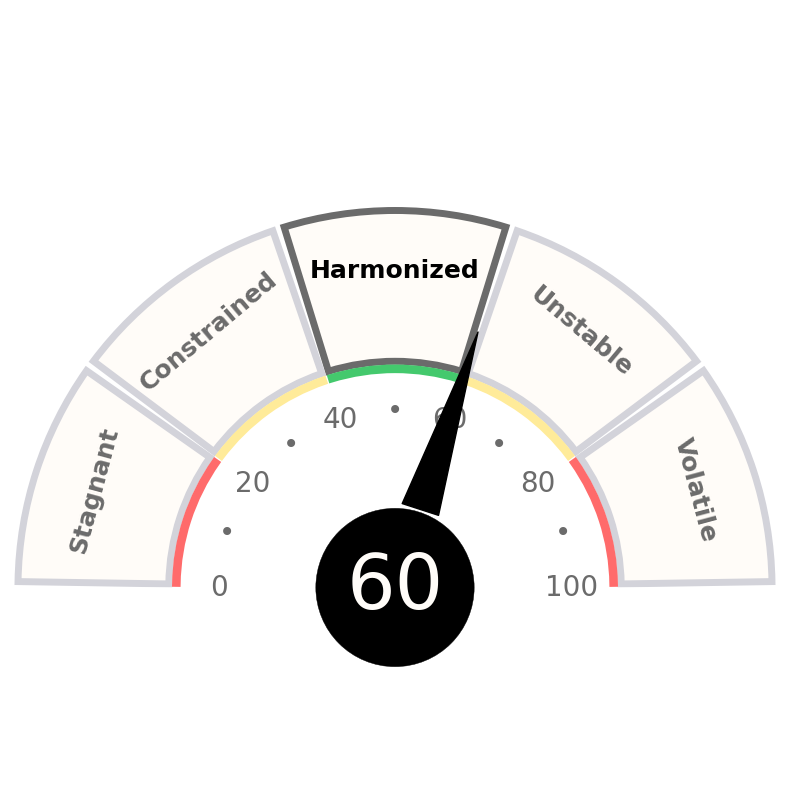

In [ ]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(projection="polar")
fig.patch.set_alpha(0)
ax.set_facecolor('none')

# TICKS
for i, (loc, val) in enumerate(
        zip([deg_to_rad(i) for i in [0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180]], ticks)):
    color = highlighted_edgecolor
    ha = "center"
    plt.annotate(val, xy=(loc, 1.17), ha=ha, va="center", fontsize="20", color=color)

# NEEDLE
plt.annotate(round(airi_score), xytext=(0, 0), xy=(deg_to_rad((100 - round(airi_score)) / 100 * 180), 1.8),
              fontsize=55, color=fillcolor, va="center", ha="center",
              arrowprops=dict(arrowstyle="wedge, tail_width=0.5", color="black"),
              bbox=dict(boxstyle="circle, pad=0.4", facecolor="black", linewidth=0.3))

# BARS - EDGES
for i, (x, height) in enumerate(zip(x_axis_vals, values)):
    edgecolor = highlighted_edgecolor if i == highlight_index else default_edgecolor
    ax.bar(x=x + gap / 2, width=bar_width, height=1, bottom=1.5, linewidth=5, edgecolor=edgecolor, color=fillcolor,
            align="edge")

# ADDITIONAL LINE
for i, (x, height) in enumerate(zip(x_axis_vals, values)):
    edgecolor = negative_edgecolor if i == 0 or i == 4 else neutral_edgecolor if i == 1 or i == 3 else positive_edgecolor
    ax.bar(x=x + gap / 2, width=bar_width, height=0.02, bottom=1.44, linewidth=4, edgecolor=edgecolor,
            align="edge")

# ANNOTATIONS
for i, (text, x, y, rot) in enumerate(annotations_new):
    color = "black" if i == highlight_index else highlighted_edgecolor
    plt.annotate(text, xy=(deg_to_rad(x), y), rotation=rot, fontweight="bold", fontsize=18, color=color,
                  rotation_mode='anchor', transform=ax.transData, ha="center")

ax.set_thetalim(0, np.pi)
ax.set_axis_off()

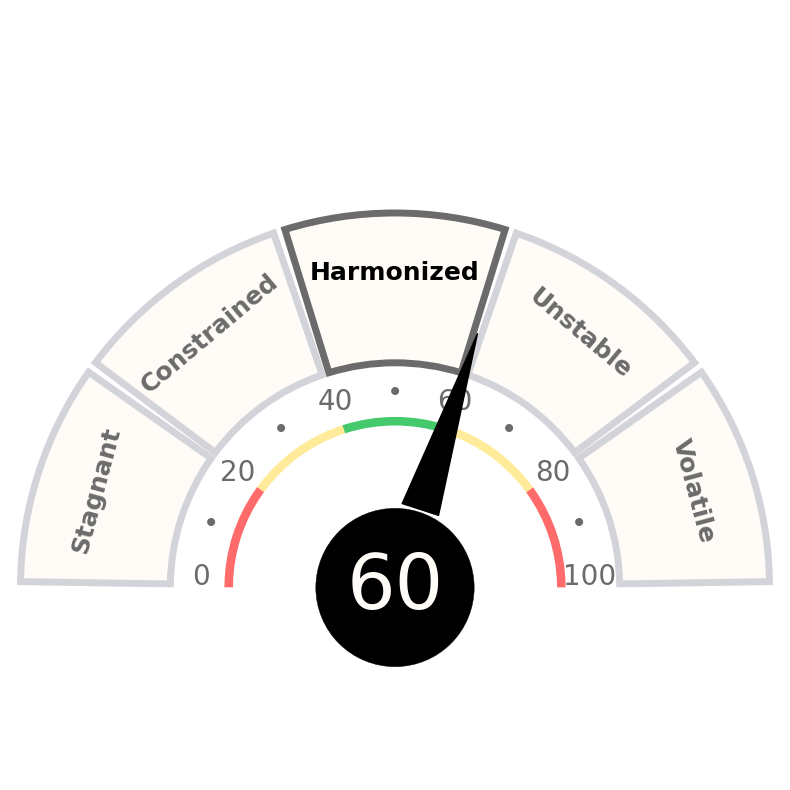

In [36]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(projection="polar")
fig.patch.set_alpha(0)
ax.set_facecolor('none')

# TICKS
for i, (loc, val) in enumerate(
        zip([deg_to_rad(i) for i in [3, 19, 36, 54, 72, 90, 108, 126, 144, 161, 177]], ticks)):
    color = highlighted_edgecolor
    ha = "center"
    plt.annotate(val, xy=(loc, 1.3), ha=ha, va="center", fontsize="20", color=color)


# NEEDLE
plt.annotate(round(airi_score), xytext=(0, 0), xy=(deg_to_rad((100 - round(airi_score)) / 100 * 180), 1.8),
              fontsize=55, color=fillcolor, va="center", ha="center",
              arrowprops=dict(arrowstyle="wedge, tail_width=0.5", color="black"),
              bbox=dict(boxstyle="circle, pad=0.4", facecolor="black", linewidth=0.3))

# BARS - EDGES
for i, (x, height) in enumerate(zip(x_axis_vals, values)):
    edgecolor = highlighted_edgecolor if i == highlight_index else default_edgecolor
    ax.bar(x=x + gap / 2, width=bar_width, height=1, bottom=1.5, linewidth=5, edgecolor=edgecolor, color=fillcolor,
            align="edge")

# ADDITIONAL LINE
for i, (x, height) in enumerate(zip(x_axis_vals, values)):
    edgecolor = negative_edgecolor if i == 0 or i == 4 else neutral_edgecolor if i == 1 or i == 3 else positive_edgecolor
    ax.bar(x=x + gap / 2, width=bar_width, height=0.02, bottom=1.1, linewidth=4, edgecolor=edgecolor,
            align="edge")

# ANNOTATIONS
for i, (text, x, y, rot) in enumerate(annotations_new):
    color = "black" if i == highlight_index else highlighted_edgecolor
    plt.annotate(text, xy=(deg_to_rad(x), y), rotation=rot, fontweight="bold", fontsize=18, color=color,
                  rotation_mode='anchor', transform=ax.transData, ha="center")

ax.set_thetalim(0, np.pi)
ax.set_axis_off()